## Exercise 02 - Connectionist Neurons and Multi Layer Perceptrons

## Exercise 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [168]:
def f(h):
    out_array = []
    for i in h:
        if i>=0: out_array = [out_array, 1]
        else: out_array = [out_array, 0]

In [169]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',', 
                       dtype=np.float, skip_header=1)

x_1 = expdat[:,0]
x_2 = expdat[:,1]
y = expdat[:,2]

In [170]:
func = lambda h: 1 if h>=0 else 0

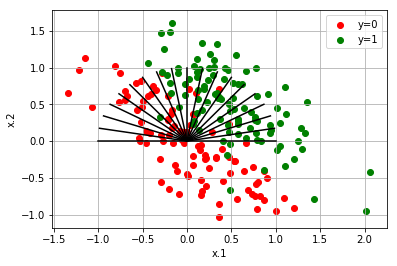

In [171]:
plt.figure()
plt.scatter(x_1[y==0], x_2[y==0], label = 'y=0', color= 'r')
plt.scatter(x_1[y==1], x_2[y==1], label = 'y=1', color= 'g')
plt.legend()
plt.grid()
plt.xlabel("x.1")
plt.ylabel("x.2")

radius = 1
angle = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
         110, 120,130, 140, 150, 160, 170, 180]

bias = 0
correct_class = {}
w_vectors={}
f = lambda x : 1 if (x >=0) else 0

for i in angle:
    
    w = np.array([[radius* np.cos(i*2*np.pi/360)],
        [radius* np.sin(i*2*np.pi/360)]]).T
    h=np.array(w @ np.array((x_1, x_2)) -bias)
    
    
    y_pred = [f(a) for a in h[0, :]]


    correct = sum(y==y_pred)
    plt.plot((0, w[0, 0]), (0, w[0, 1]), color= 'black')
    
    correct_class[i] = (correct/y.shape[0])*100

    w_vectors[i] = w

plt.show()


In [172]:
# Classification performance

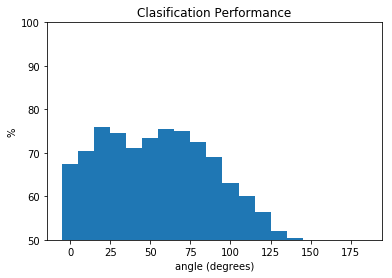

In [173]:
plt.figure()
plt.title("Clasification Performance")
plt.bar(correct_class.keys(), correct_class.values(), 10)
plt.xlabel("angle (degrees)")
plt.ylabel("%")
plt.ylim(50, 100)
plt.show()

In [174]:
better_w_angle = max(correct_class, key=correct_class.get)
print(better_w_angle)

20


In [175]:
bias = np.linspace(-3, 3, 60)
w = np.array([[radius* np.cos(better_w_angle*2*np.pi/360)],
              [radius* np.sin(better_w_angle*2*np.pi/360)]]).T

f = lambda x : 1 if (x >=0) else 0

correct_class = np.zeros((2, len(bias)))

for bind, b in enumerate(bias):
    
        h=np.array(w @ np.array((x_1, x_2)) - b)
    
        y_pred = [f(a) for a in h[0, :]]

        per_cent = sum(y==y_pred)/y.shape[0]
            
        correct_class[:, bind] = np.array([b, per_cent ]).T
        

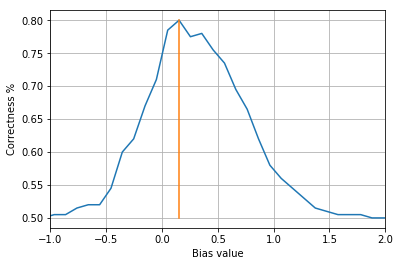

In [176]:
plt.figure()
plt.plot(correct_class[0,:], correct_class[1,:])

max_value = np.max(correct_class[1,:])
ind_value = np.argmax(correct_class[1,:])
bias_val = correct_class[0, ind_value]
plt.xlabel("Bias value")
plt.ylabel("Correctness %")
plt.xlim(-1, 2)
plt.plot((bias_val, bias_val), (0.5, max_value))
plt.grid()
plt.show()

In [177]:
h=np.array(w @ np.array((x_1, x_2)) - bias_val)
y_pred = [f(a) for a in h[0, :]]
y_pred = np.array(y_pred)

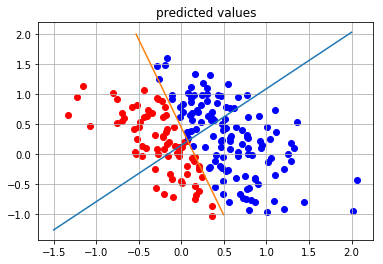

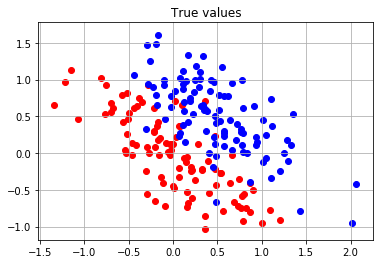

In [184]:
plt.figure()
plt.title("predicted values")
plt.scatter(x_1[y_pred==0], x_2[y_pred==0], label = 'y=0', color= 'r')
plt.scatter(x_1[y_pred==1], x_2[y_pred==1], label = 'y=0', color= 'b')
x = np.linspace(-1.5, 2)
y_plot = np.linspace(-1, 2)
plt.plot(x, x*w[0, 0]+bias_val)
plt.plot(y_plot*-w[0, 1]+bias_val, y_plot)
plt.grid()



plt.figure()
plt.title("True values")
plt.scatter(x_1[y==0], x_2[y==0], label = 'y=0', color= 'r')
plt.scatter(x_1[y==1], x_2[y==1], label = 'y=0', color= 'b')
plt.grid()


In [231]:
radius = 1
angle = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
         110, 120,130, 140, 150,]

bias = np.linspace(1.5, -1.5, 15)

sol = np.zeros((len(bias), len(angle)))

for i_ang, ang in enumerate(angle):
    for i_bi, bia in enumerate(bias):
        
        w = np.array([[radius* np.cos(ang*2*np.pi/360)],
        [radius* np.sin(ang*2*np.pi/360)]]).T
        h=np.array(w @ np.array((x_1, x_2)) -bia)
        
        y_pred = [f(a) for a in h[0, :]]

        sol[i_bi, i_ang] = sum(y==y_pred)/y.shape[0]
    

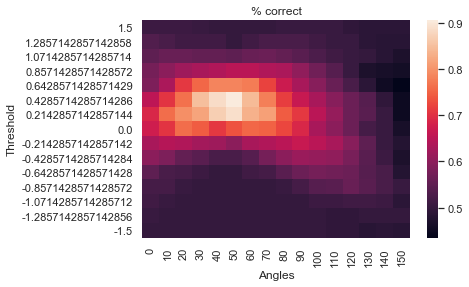

In [243]:
import seaborn as sns; 
sns.set_theme()

ax = sns.heatmap(sol, xticklabels=angle, yticklabels=bias)
plt.title("% correct")
plt.xlabel("Angles")
plt.ylabel("Threshold")
plt.show()

f) Grid-search looses its feasibility in very large parameter spaces, as the number of measured combinations grows exponential in the number of parameters (e.g. pixel images → millions of weights, or applying grid-search to optimize an MLP with a large number of weights).

## Exercise 03

In [172]:
## Random unitialization 

w21 = np.random.normal(0, 1, (10, 50))
w10 = np.random.normal(0, 2, (10, 50))
bi = np.random.uniform(-2, 2, (10, 50))

n_it = 20

x = np.linspace(-2, 2, n_it);
yfinal1 = np.zeros((50, n_it))

for i, xi in enumerate(x):
    
    y = np.sum(np.multiply(w21, np.tanh(w10*xi - bi)), axis = 0)
    yfinal1[:, i] = y
    


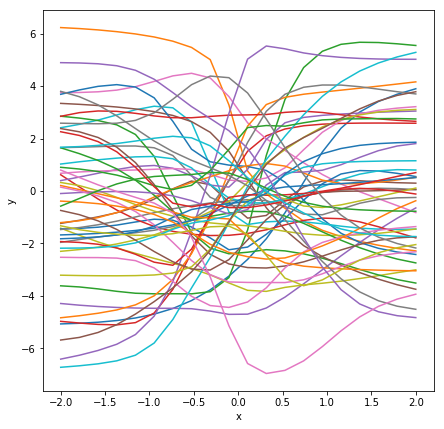

In [173]:
fig = plt.figure(figsize= (7, 7));
for i in range(yfinal.shape[0]):
    
    plt.plot(x, yfinal1[i, :])
    plt.xlabel("x")
    plt.ylabel("y")
        
        

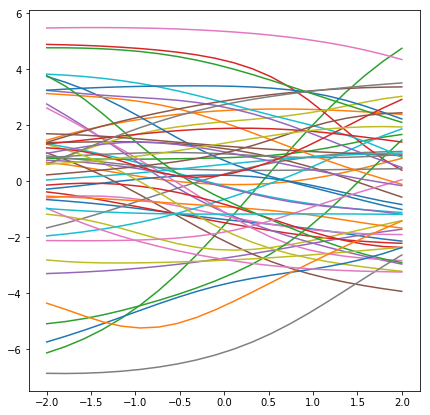

In [174]:
## Random unitialization 

w21 = np.random.normal(0, 1, (10, 50))
w10 = np.random.normal(0, 0.5, (10, 50))
bi = np.random.uniform(-2, 2, (10, 50))

n_it = 20

x = np.linspace(-2, 2, n_it);
yfinal2 = np.zeros((50, n_it))

for i, xi in enumerate(x):
    
    y = np.sum(np.multiply(w21, np.tanh(w10*xi - bi)), axis = 0)
    yfinal2[:, i] = y
    
    
    
plt.figure(figsize= (7, 7));
for i in range(yfinal.shape[0]):
    
    plt.plot(x, yfinal2[i, :])
        
        

In [186]:
y_labeled = -x;

In [187]:
from sklearn.metrics import mean_squared_error

error1 = np.zeros(50)
error2 = np.zeros(50)

for i in range(0, 50):

    error1[i] = mean_squared_error(y_labeled, yfinal1[i, :])
    error2[i] = mean_squared_error(y_labeled, yfinal2[i, :])

In [189]:
ind1 = np.argmin(error1)
ind2 = np.argmin(error2)

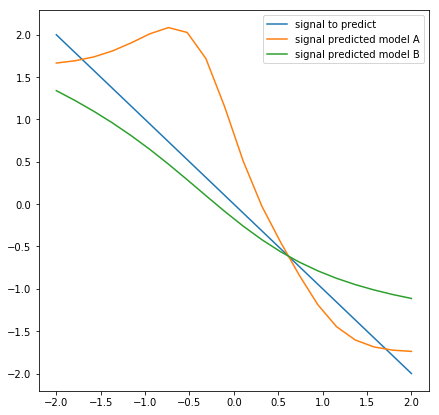

In [203]:
plt.figure(figsize = (7, 7))
plt.plot(x, y_labeled, label='signal to predict')
plt.plot(x, yfinal1[ind1, :], label= 'signal predicted model A')
plt.plot(x, yfinal2[ind2, :], label= 'signal predicted model B')
plt.legend()
plt.show()


The difference between the model A an the model B as can be seen in the above graph is the smoothness. As larger the value of the standard deviation is, the tanh funciton will go out of the linear regime.